<center> <h1> PSI3431 - Experiência 2 - Processos Estocásticos </h1> </center> <br> 
    
 Nome | NUSP 
 :--------------: | :--------------: 
 Bruno Mucha Pasini | 10845791 
 Pedro Henrique Gianjoppe dos Santos | 10774055 
 Caio Hudson Queiroz de Souza | 10773885 

In [1]:
 #import Pkg; Pkg.add("Plots")
 #import Pkg; Pkg.add("WAV")
 #import Pkg; Pkg.add("DSP")
 #import Pkg; Pkg.add("Statistics")
 #import Pkg; Pkg.add("LaTeXStrings")
 #import Pkg; Pkg.add("PlotlyJS")
 using Plots
 using Statistics
 using WAV
 using DSP
 using LaTeXStrings
plotlyjs();

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13249944538257357250\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5165190728277717240\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13249944538257357250\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

# Item 1)
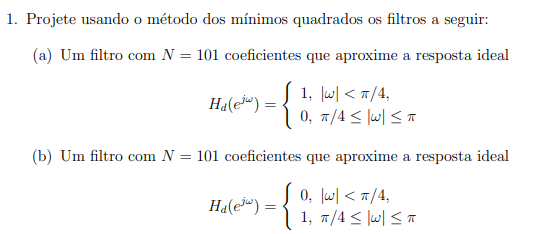

### a) Filtro passa-baixas com frequência de corte $w_{c} = \pi / 4$ e ganho 1

A anti-transformada de Fourier em Tempo Discreto irá fornecer a expressão do filtro ideal em função de n, dada por:

$h_{d}[n] = (w_{c}/\pi)*sinc((w_{c}/\pi)*n)$

Assim, temos $h_{d}[n] = (pi/4/pi)*sinc((pi/4/pi)*n) = (1/4)*sinc(n/4)$

Portanto, pelo critérios dos mínimos quadrados, o filtro realizável que melhor aproxima é:

$h[n] = h_{d}[n - L].p_{n}[n]$ , sendo $L = (N-1)/2$ para N ímpar e truncado em N = 101 coeficientes


In [2]:
N = 101

n = 0:N-1

#L = N/2 se N é par

L = (N-1)/2 #se N é impar

ωc = π/4

h1a = ωc/π * sinc.(ωc/π * (n .- L) )

plot(n, h1a, line = :stem, xlabel = "n", ylabel = "h1a[n]", label = "h1a[n]"; marker = (:circle, 3))


<!DOCTYPE html>
 
 
 Plots.jl

In [3]:
#Resposta em frequência do filtro H1a(e^jw)

w = range(0 , pi, length = 2500)
h1af = PolynomialRatio(h1a , [1])
H1a = freqz(h1af, w)

p1 = plot(w/pi, abs.(H1a), xlabel = "w/pi", ylabel = "|H1a(e^jw)|", label = "|H1a(e^jw)|")

p2 = plot(w/pi,  unwrap(angle.(H1a))*180/pi, xlabel = "w/pi", ylabel = "/_H1a(e^jw)", label = "/_H1a(e^jw)", line = :magenta)

plot(p1, p2, layout = (2,1))

<!DOCTYPE html>
 
 
 Plots.jl

### b) Filtro passa-altas com frequência de corte $w_{c} = \pi / 4$ e ganho 1

A anti-transformada de Fourier em Tempo Discreto irá fornecer a expressão do filtro ideal em função de n, dada por:

$H_{PA}(e^{jw})= 1 - H_{PB}(e^{jw}) $


$h_{d}[n] = \delta[n] - h_{PB}[n] = \delta[n] - (w_{c}/\pi)*sinc((w_{c}/\pi)*n) $

Portanto, pelo critérios dos mínimos quadrados, o filtro realizável que melhor aproxima é:

$h[n] = h_{d}[n - L].p_{n}[n]$ , sendo $L = (N-1)/2$ para N ímpar e truncado em N = 101 coeficientes


In [4]:
N = 101

n = 0:N-1

#L = N/2 se N é par

L = Int((N-1)/2) #se N é impar

ωc = π/4

#Resposta em frequência do delta[n - L]

hdelta = zeros(N)

hdelta[L+1] = 1

p1 = plot(n, hdelta, line = :stem, xlabel = "n", ylabel = "hdelta[n]", label = "hdelta[n]"; marker = (:circle, 3))

w = range(0 , pi, length = 200)

hdeltaf = PolynomialRatio(hdelta , [1])

Hdelta = freqz(hdeltaf, w)

p2 = plot(w/pi, abs.(Hdelta), xlabel = "w/pi", ylabel = "|Hdelta(e^jw)|", label = "|Hdelta(e^jw)|")

p3 = plot(w/pi,  unwrap(angle.(Hdelta))*180/pi, xlabel = "w/pi", ylabel = "/_Hdelta(e^jw)", label = "/_Hdelta(e^jw)", line = :magenta)

plot(p1, p2,  p3, layout = (3,1))

<!DOCTYPE html>
 
 
 Plots.jl

In [5]:
#Resposta em frequência do filtro H2a(e^jw)

h1b = hdelta - h1a

p1 = plot(n, h1b, line = :stem, xlabel = "n", ylabel = "h1b[n]", label = "h1b[n]"; marker = (:circle, 3))

w = range(0 , pi, length = 200)

h1bf = PolynomialRatio(h1b , [1])

H1b = freqz(h1bf, w)

p2 = plot(w/pi, abs.(H1b), xlabel = "w/pi", ylabel = "|H1b(e^jw)|", label = "|H1b(e^jw)|")

p3 = plot(w/pi,  unwrap(angle.(H1b))*180/pi, xlabel = "w/pi", ylabel = "/_H1b(e^jw)", label = "/_H1b(e^jw)", line = :magenta)

plot(p1, p2,  p3, layout = (3,1))

<!DOCTYPE html>
 
 
 Plots.jl

# Item 2)
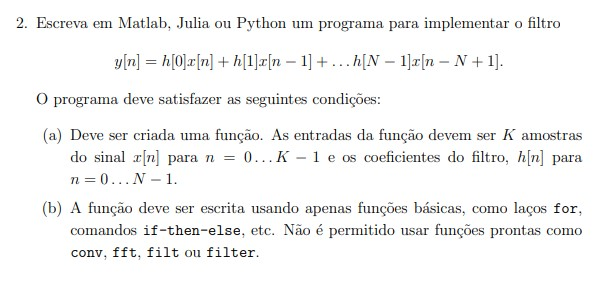

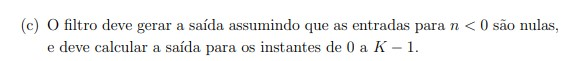

- Filtro FIR não recursivo

:: Implementar uma função para somatória da convulução


y = 0
for(k de 0 a N - 1) {
    y = y + h[k]x[n-k]
}



In [6]:
function filtrar(x, h) # recebe x[n] e h[n]
    y = zeros(length(x))
    for i in 1:length(x)
        for j in 1:length(h)
            if i-j >0
                y[i-1] += h[j]*x[i-j]
            end
        end
    end
    return y
end

filtrar (generic function with 1 method)

# Item 3)
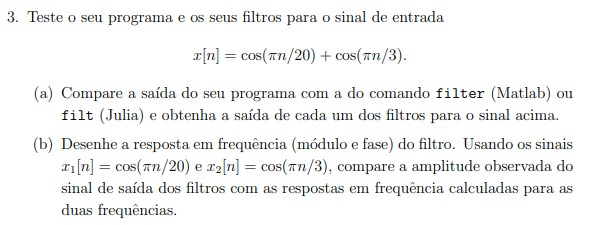

In [7]:
# o sinal de entrada
n = 0:1000
x = cos.(π/20 * n) + cos.(π/3 * n)
plt = plot(n,x, xlabel = "n", ylabel = "x[n]", title = "cos(n π/20) + cos(n π/3)")

<!DOCTYPE html>
 
 
 Plots.jl

In [8]:
# Passa baixas
y = filtrar(x,h1a)
y_filt = filt(h1a,x)

plt = plot(n, y, ylabel = "saída filtro", xlabel = "n", label="função criada")
plot!(n, y_filt, label="função filt nativa")

<!DOCTYPE html>
 
 
 Plots.jl

In [9]:
# Passa altas

y = filtrar(x,hdelta)
y_filt = filt(hdelta,x)

plt = plot(n, y, ylabel = "saída filtro", xlabel = "n", label="função criada")
plot!(n, y_filt, label="função filt nativa")

<!DOCTYPE html>
 
 
 Plots.jl

# Item 4)
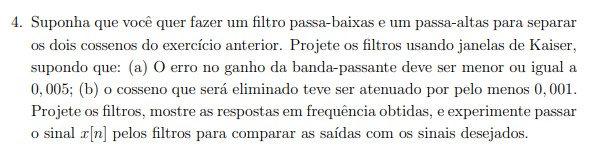


### Filtro Passa-Baixas

Como indicado no item 1a), a anti-transformada de Fourier em Tempo Discreto irá fornecer a expressão do filtro ideal em função de n, dada por:

$h_{PB}[n] = (w_{c}/\pi)*sinc((w_{c}/\pi)*n)$

Portanto, com Janelas de Kaiser, o filtro realizável que melhor aproxima é:

$h_{PBk}[n] = h_{PB}[n - L].w_{k}[n]$ , sendo $w_{k}[n]$ a janela de kaiser.

In [10]:

ωr = π/3;#Frequência de rejeição -> Frequência mais alta
ωp = π/20; #Frequência de passagem -> Frequência mais baixa

Δω = abs(ωr - ωp);
ωc = (ωp + ωr) / 2;

δp = 0.005; #O erro no ganho da banda-passante deve ser menor ou igual a 0,005
δr = 0.001; #o cosseno que será eliminado deve ser atenuado por pelo menos 0,001.


print("\nΔω  = ",Δω )
print("\nωc  = ",ωc)
print("\nδp  = ",δp )
print("\nδr  = ",δr)


Δω  = 0.890117918517108
ωc  = 0.6021385919380436
δp  = 0.005
δr  = 0.001

In [11]:
#Janelas de Kaiser
A = -20log10(min(δp, δr))
Nk = ceil(Int, (A - 8) / (2.285 * Δω) + 1)
Nk += (Nk % 2) == 0 ? 1 : 0 ##N deve ser ímpar pois é filtro passa-altas

print("A = ",A,"\nNk = ",Nk)

A = 60.0
Nk = 27

In [12]:
function kaiserbeta(δp, δr, Δω)
 δ = min(δp, δr)
 A = -20log10(δ)
 if A < 21
 return 0.0
 elseif A ≤ 50
 return 0.5842(A-21)^0.4 + 0.07886(A-21)
 else
 return 0.1102(A-8.7)
 end
end

kaiserbeta (generic function with 1 method)

In [13]:
Lk = Int((Nk - 1) / 2)
n = 0: Nk - 1
β = kaiserbeta(δp, δr, Δω)

print("\nβ  = ",β)
print("\nLk  = ",Lk)
print("\nNk  = ",Nk)


β  = 5.65326
Lk  = 13
Nk  = 27

In [14]:
plot(n, kaiser(Nk, β/π))

<!DOCTYPE html>
 
 
 Plots.jl

In [15]:
#Resposta em frequência do Passa-Baixas ideal

hPB = ωc/π * sinc.(ωc/π * (n .- Lk) )

#Resposta em frequência do filtro com janela de kaiser

hPBk = hPB .* kaiser(Nk, β/π)
plot(n, hPBk, line = :stem, marker = (:circle, 3),  xlabel = "n", label = "hPBk[n]")

<!DOCTYPE html>
 
 
 Plots.jl

Calculando a resposta em frequência do filtro, temos:

In [16]:
w = range(0 , pi, length = 200)

hPBkf = PolynomialRatio(hPBk , [1])

HPBk = freqz(hPBkf, w)

p1 = plot(w/pi, abs.(HPBk), xlabel = "w/pi", ylabel = "|HPBk(e^jw)|", label = "|HPBAk(e^jw)|")

p2 = plot(w/pi,  unwrap(angle.(HPBk))*180/pi, xlabel = "w/pi", ylabel = "/_HPBk(e^jw)", label = "/_HPBk(e^jw)", line = :magenta)

plot(p1, p2, layout = (2,1))

<!DOCTYPE html>
 
 
 Plots.jl

In [17]:
plot(w / π, 20log10.(abs.(HPBk)), xlabel = "ω (rad/amostra)", label = "|HPBk(e^jω)|", linewidth = 2)
plot!([0, ωp/π], 20log10.(fill(1-δp, 2)), line = :red)
plot!([0, ωp/π], 20log10.(fill(1+δp, 2)), line = :red)
plot!([ωr/π, 1], 20log10.(fill(δr, 2)), line = :red)
plot!(fill(ωp/π, 2), [-80, 20log10.(1-δp)], line = :red)
plot!(fill(ωr/π, 2), [20log10.(δr), 0], line = :red,
 ylim = (-100,5))

<!DOCTYPE html>
 
 
 Plots.jl

In [18]:
#Aproximando a banda passante:
plot(w / π, 20log10.(abs.(HPBk)), xlabel = "ω (rad/amostra)", label = "|HPBk(e^jω)|", linewidth = 2)
plot!([0, ωp/π], 20log10.(fill(1-δp, 2)), line = :red)
plot!([0, ωp/π], 20log10.(fill(1+δp, 2)), line = :red)
plot!([ωr/π, 1], 20log10.(fill(δr, 2)), line = :red)
plot!(fill(ωp/π, 2), [-80, 20log10.(1-δp)], line = :red)
plot!(fill(ωr/π, 2), [20log10.(δr), 0], line = :red, xlim = (0,0.1),
 ylim = (-0.05,0.05))

<!DOCTYPE html>
 
 
 Plots.jl

### Filtro Passa-Altas

Como indicado no item 1b), o filtro ideal trata-se de Filtro passa-altas com frequência de corte $w_{c}$ e ganho 1

A anti-transformada de Fourier em Tempo Discreto irá fornecer a expressão do filtro ideal em função de n, dada por:

$H_{PA}(e^{jw})= 1 - H_{PB}(e^{jw}) $


$h_{PA}[n] = \delta[n] - h_{PB}[n] = \delta[n] - (w_{c}/\pi)*sinc((w_{c}/\pi)*n) $

Portanto, com Janelas de Kaiser, o filtro realizável que melhor aproxima é:

$h_{PAk}[n] = h_{PA}[n - L].w_{k}[n]$ , sendo $w_{k}[n]$ a janela de kaiser.

In [19]:
ωr = π/20;#Frequência de rejeição -> Frequência mais baixa
ωp = π/3; #Frequência de passagem -> Frequência mais alta

Δω = abs(ωr - ωp);
ωc = (ωp + ωr) / 2;

δp = 0.005; #O erro no ganho da banda-passante deve ser menor ou igual a 0,005

δr = 0.001; #o cosseno que será eliminado deve ser atenuado por pelo menos 0,001.

print("\nΔω  = ",Δω )
print("\nωc  = ",ωc)
print("\nδp  = ",δp )
print("\nδr  = ",δr)


Δω  = 0.890117918517108
ωc  = 0.6021385919380436
δp  = 0.005
δr  = 0.001

In [20]:
#Janelas de Kaiser
A = -20log10(min(δp, δr))
Nk = ceil(Int, (A - 8) / (2.285 * Δω) + 1)
Nk += (Nk % 2) == 0 ? 1 : 0 ##N deve ser ímpar pois é filtro passa-altas

print("A = ",A,"\nNk = ",Nk)

A = 60.0
Nk = 27

In [21]:
Lk = Int((Nk - 1) / 2)
n = 0: Nk - 1
β = kaiserbeta(δp, δr, Δω)

print("\nβ  = ",β)
print("\nLk  = ",Lk)
print("\nNk  = ",Nk)


β  = 5.65326
Lk  = 13
Nk  = 27

In [22]:
plot(n, kaiser(Nk, β/π))

<!DOCTYPE html>
 
 
 Plots.jl

In [23]:
#Resposta em frequência do Passa-Baixas ideal

hPB = ωc/π * sinc.(ωc/π * (n .- Lk) )

#Resposta em frequência do delta[n]

hdelta = zeros(Nk)

hdelta[Lk+1] = 1

#Resposta em frequência do filtro Passa-Altas ideal

hPA = hdelta - hPB

#Resposta em frequência do filtro com janela de kaiser

hPAk = hPA .* kaiser(Nk, β/π)
plot(n, hPAk, line = :stem, marker = (:circle, 3),  xlabel = "n", label = "hPAk[n]")

<!DOCTYPE html>
 
 
 Plots.jl

Calculando a resposta em frequência do filtro, temos:

In [24]:
w = range(0 , pi, length = 200)

hPAkf = PolynomialRatio(hPAk , [1])

HPAk = freqz(hPAkf, w)

p1 = plot(w/pi, abs.(HPAk), xlabel = "w/pi", ylabel = "|HPAk(e^jw)|", label = "|HPAk(e^jw)|")

p2 = plot(w/pi,  unwrap(angle.(HPAk))*180/pi, xlabel = "w/pi", ylabel = "/_HPAk(e^jw)", label = "/_HPAk(e^jw)", line = :magenta)

plot(p1, p2, layout = (2,1))

<!DOCTYPE html>
 
 
 Plots.jl

In [25]:
plot(w / π, 20log10.(abs.(HPAk)), xlabel = "ω (rad/amostra)", label = "|HPAk(e^jω)|", linewidth = 2)
plot!([ωp/π, 1], 20log10.(fill(1-δp, 2)), line = :red)
plot!([ωp/π, 1], 20log10.(fill(1+δp, 2)), line = :red)
plot!([0, ωr/π], 20log10.(fill(δr, 2)), line = :red)
plot!(fill(ωr/π, 2), [20log10.(δr), 0], line = :red)
plot!(fill(ωp/π, 2), [-80, 20log10.(1-δp)], line = :red,
 ylim = (-100,5))

<!DOCTYPE html>
 
 
 Plots.jl

In [26]:
plot(w / π, 20log10.(abs.(HPAk)), xlabel = "ω (rad/amostra)", label = "|HPAk(e^jω)|", linewidth = 2)
plot!([ωp/π, 1], 20log10.(fill(1-δp, 2)), line = :red)
plot!([ωp/π, 1], 20log10.(fill(1+δp, 2)), line = :red)
plot!([0, ωr/π], 20log10.(fill(δr, 2)), line = :red)
plot!(fill(ωr/π, 2), [20log10.(δr), 0], line = :red)
plot!(fill(ωp/π, 2), [-80, 20log10.(1-δp)], line = :red, xlim = (0.3,1),
 ylim = (-0.05,0.05))

<!DOCTYPE html>
 
 
 Plots.jl

### Entradas

In [27]:
fa = 40e3

N = 100

n = 0:N-1

x1 = cos.(π*n/20)

x2 = cos.(π*n/3)

x = x1 + x2

p1 = plot(n, x1, linewidth = 1, xlabel = "n", label = "x1[n]")

p2 = plot(n, x2, linewidth = 1, xlabel = "n", label = "x2[n]")

p3 = plot(n, x, linewidth = 1, xlabel = "n", label = "x[n]", line = :magenta)

plot(p1, p2, p3, layout = (3,1))

<!DOCTYPE html>
 
 
 Plots.jl

Passando o sinal $x[n] = x_{1}[n] + x_{2}[n]$ pelos dois filtros projetados com Janelas de Kaiser $H_{PAk}(e^{jw})$ e $H_{PBk}(e^{jw})$

In [28]:
yPA = filt(hPAk, x)
yPB = filt(hPBk, x)

p1 = plot(n, yPB, linewidth = 1, xlabel = "n", label = "yPB[n]")
p2 = plot(n, yPA, linewidth = 1, xlabel = "n", label = "yPA[n]")

plot(p1, p2, layout = (2,1))

<!DOCTYPE html>
 
 
 Plots.jl

Assim, o é possível obter o sinal $x_{1}$ a partir do Filtro Passa-Baixas e o sinal $x_{2}$ a partir do Filtro Passa-Altas.

Porém, os sinais obtidos estão atrasados de aproximadamente 10 amostras com relação ao sinal original.

# Item 5)
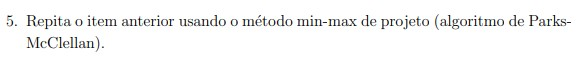


### Filtro Passa-Baixas

Considerando o filtro passa baixas ideal:

$H_{PB}(e^{j \omega}) = \begin{cases} 1, & |\omega|<\omega_{c} \\ 0, & \omega_{c} \leq |\omega| < \pi \end{cases}$

Utilizando o critério min-max, o filtro realizável $H_{PBm}$ que melhor aproxima $H_{PB}$ é o que atende à condição:

$\min\limits_{h[0], \mbox{ } \dots \mbox{ }, h[N-1]} \mbox{   } \max\limits_{\omega \mbox{ } \in \mbox{ } F} \mbox{  }$
$W(\omega)|H_{PB}(e^{j \omega})-H_{PBm}(e^{j \omega})|$

Onde $F=[0,\omega_{p}]\mbox{ } U\mbox{ } [\omega_{r},\pi]$ 
e $W(\omega) = \begin{cases} 1, & |\omega|<\omega_{p} \\ \frac{\delta_{p}}{\delta_{r}}, & \omega_{r} \leq |\omega| \leq \pi \end{cases}$

Utilizando o algoritmo de Parks-McClellan a solução fica assim:

In [29]:
##Parâmetros iniciais

ωr = π/3;#Frequência de rejeição -> Frequência mais alta
ωp = π/20; #Frequência de passagem -> Frequência mais baixa

Δω = abs(ωr - ωp);
ωc = (ωp + ωr) / 2;

δp = 0.005; #O erro no ganho da banda-passante deve ser menor ou igual a 0,005

δr = 0.001;#o cosseno que será eliminado deve ser atenuado por pelo menos 0,001.

print("\nΔω  = ",Δω )
print("\nωc  = ",ωc)
print("\nδp  = ",δp )
print("\nδr  = ",δr)


Δω  = 0.890117918517108
ωc  = 0.6021385919380436
δp  = 0.005
δr  = 0.001

In [30]:
##Obtendo o comprimento do filtro utilizando uma expressão aproximada de Kaiser

Npm = ceil(Int, (-10log10(δp * δr) -13)/2.324Δω) + 1

21

In [31]:
##Resolvendo o problema de otimização do método min-max

npm = 0:Npm-1
peso = δp / δr
hpbm = remez(Npm, [(0, ωp/π) => (1, 1), (ωr/π, 1) => (0, peso)]; Hz = 2) ##função remez() usa o algoritmo de Parks-McClellean para resolver a otimização
plot(npm, hpbm, line = :stem, marker = (:circle, 3),
 xlabel = "n", label = "hpbm[n]")

<!DOCTYPE html>
 
 
 Plots.jl

In [32]:
##Obtendo a resposta em frequência

ω = range(0 , π, length = 200)
hpbmf = PolynomialRatio(hpbm, [1])
Hpbm = freqz(hpbmf, ω)

plot(ω / π, 20log10.(abs.(Hpbm)), xlabel = "ω (rad/amostra)", label = "|H(e^jω)|", linewidth = 2)
plot!([0, ωp/π], 20log10.(fill(1-δp, 2)), line = :red)
plot!([0, ωp/π], 20log10.(fill(1+δp, 2)), line = :red)
plot!([ωr/π, 1], 20log10.(fill(δr, 2)), line = :red)
plot!(fill(ωp/π, 2), [-80, 20log10.(1-δp)], line = :red)
plot!(fill(ωr/π, 2), [20log10.(δr), 0], line = :red,
 ylim = (-100,5))

<!DOCTYPE html>
 
 
 Plots.jl

In [33]:
#Aproximando a banda passante:
plot(w / π, 20log10.(abs.(HPBk)), xlabel = "ω (rad/amostra)", label = "|HPBk(e^jω)|", linewidth = 2)
plot!([0, ωp/π], 20log10.(fill(1-δp, 2)), line = :red)
plot!([0, ωp/π], 20log10.(fill(1+δp, 2)), line = :red)
plot!([ωr/π, 1], 20log10.(fill(δr, 2)), line = :red)
plot!(fill(ωp/π, 2), [-80, 20log10.(1-δp)], line = :red)
plot!(fill(ωr/π, 2), [20log10.(δr), 0], line = :red, xlim = (0,0.1),
 ylim = (-0.05,0.05))

<!DOCTYPE html>
 
 
 Plots.jl

In [34]:
p1 = plot(ω/π, abs.(Hpbm), xlabel = "ω/π", ylabel = "|Hpbm(e^jω)|", label = "|Hpbm(e^jω)|")

p2 = plot(ω/π,  unwrap(angle.(Hpbm))*180/π, xlabel = "ω/π", ylabel = "/_Hpbm(e^jω)", label = "/_Hpbm(e^jω)", line = :magenta)

plot(p1, p2, layout = (2,1))

<!DOCTYPE html>
 
 
 Plots.jl

### Filtro Passa-Altas

Considerando o filtro passa altas ideal:

$H_{PA}(e^{jw})= 1 - H_{PB}(e^{jw}) = \begin{cases} 0, & |\omega|<\omega_{c} \\ 1, & \omega_{c} \leq |\omega| < \pi \end{cases}$

Utilizando o critério min-max, o filtro realizável $H_{PAm}$ que melhor aproxima $H_{PA}$ é o que atende à condição:

$\min\limits_{h[0], \mbox{ } \dots \mbox{ }, h[N-1]} \mbox{   } \max\limits_{\omega \mbox{ } \in \mbox{ } F} \mbox{  }$
$W(\omega)|H_{PA}(e^{j \omega})-H_{PAm}(e^{j \omega})|$

Onde $F=[0,\omega_{r}]\mbox{ } U\mbox{ } [\omega_{p},\pi]$ 
e $W(\omega) = \begin{cases} 1, & \omega_{p} \leq |\omega| \leq \pi \\ \frac{\delta_{p}}{\delta_{r}}, & |\omega|<\omega_{r} \end{cases}$

Utilizando o algoritmo de Parks-McClellan a solução fica assim:

In [35]:
##Parâmetros iniciais

ωr = π/20;#Frequência de rejeição -> Frequência mais baixa
ωp = π/3; #Frequência de passagem -> Frequência mais alta

Δω = abs(ωr - ωp);
ωc = (ωp + ωr) / 2;

δp = 0.005; #O erro no ganho da banda-passante deve ser menor ou igual a 0,005

δr = 0.001; #o cosseno que ser´a eliminado teve ser atenuado por pelo menos 0,001.

print("\nΔω  = ",Δω )
print("\nωc  = ",ωc)
print("\nδp  = ",δp )
print("\nδr  = ",δr)


Δω  = 0.890117918517108
ωc  = 0.6021385919380436
δp  = 0.005
δr  = 0.001

In [36]:
##Obtendo o comprimento do filtro utilizando uma expressão aproximada de Kaiser

Npm = ceil(Int, (-10log10(δp * δr) -13)/2.324Δω) + 1

21

In [37]:
##Resolvendo o problema de otimização do método min-max

npm = 0:Npm-1
peso = δp / δr
hpam = remez(Npm, [(0, ωr/π) => (0, peso), (ωp/π, 1) => (1, 1)]; Hz = 2) ##função remez() usa o algoritmo de Parks-McClellean para resolver a otimização
plot(npm, hpam, line = :stem, marker = (:circle, 3),
 xlabel = "n", label = "hpam[n]")

<!DOCTYPE html>
 
 
 Plots.jl

In [38]:
##Obtendo a resposta em frequência

ω = range(0 , π, length = 200)
hpamf = PolynomialRatio(hpam, [1])
Hpam = freqz(hpamf, ω)

plot(ω / π, 20log10.(abs.(Hpam)), xlabel = "ω (rad/amostra)", label = "|H(e^jω)|", linewidth = 2)
plot!([ωp/π, 1], 20log10.(fill(1-δp, 2)), line = :red)
plot!([ωp/π, 1], 20log10.(fill(1+δp, 2)), line = :red)
plot!([0, ωr/π], 20log10.(fill(δr, 2)), line = :red)
plot!(fill(ωr/π, 2), [20log10.(δr), 0], line = :red)
plot!(fill(ωp/π, 2), [-80, 20log10.(1-δp)], line = :red,
 ylim = (-100,5))

<!DOCTYPE html>
 
 
 Plots.jl

In [39]:
#Aproximando Banda Passante
plot(w / π, 20log10.(abs.(HPAk)), xlabel = "ω (rad/amostra)", label = "|HPAk(e^jω)|", linewidth = 2)
plot!([ωp/π, 1], 20log10.(fill(1-δp, 2)), line = :red)
plot!([ωp/π, 1], 20log10.(fill(1+δp, 2)), line = :red)
plot!([0, ωr/π], 20log10.(fill(δr, 2)), line = :red)
plot!(fill(ωr/π, 2), [20log10.(δr), 0], line = :red)
plot!(fill(ωp/π, 2), [-80, 20log10.(1-δp)], line = :red, xlim = (0.3,1),
 ylim = (-0.05,0.05))

<!DOCTYPE html>
 
 
 Plots.jl

In [40]:
p1 = plot(ω/π, abs.(Hpam), xlabel = "w/pi", ylabel = "|Hpam(e^jw)|", label = "|Hpam(e^jw)|")

p2 = plot(ω/π,  unwrap(angle.(Hpam))*180/π, xlabel = "ω/π", ylabel = "/_Hpam(e^jw)", label = "/_Hpam(e^jw)", line = :magenta)

plot(p1, p2, layout = (2,1))

<!DOCTYPE html>
 
 
 Plots.jl

## Passando entrada x[n] pelos filtros

In [41]:
## Entrada x[n]

fa = 40e3

N = 100

n = 0:N-1

x1 = cos.(π*n/20)

x2 = cos.(π*n/3)

x = x1 + x2

p1 = plot(n, x1, linewidth = 1, xlabel = "n", label = "x1[n]")

p2 = plot(n, x2, linewidth = 1, xlabel = "n", label = "x2[n]")

p3 = plot(n, x, linewidth = 1, xlabel = "n", label = "x[n]", line = :magenta)

plot(p1, p2, p3, layout = (3,1))

<!DOCTYPE html>
 
 
 Plots.jl

In [42]:
## Passando os sinais pelos filtros

yPAm = filt(hpam, x) #filtro passa altas pelo método min-max
yPBm = filt(hpbm, x) #filtro passa baixas pelo método min-max

p1 = plot(n, yPBm, linewidth = 1, xlabel = "n", label = "yPB[n]")
p2 = plot(n, yPAm, linewidth = 1, xlabel = "n", label = "yPA[n]")

plot(p1, p2, layout = (2,1))

<!DOCTYPE html>
 
 
 Plots.jl